In [2]:
# To begin, import the following: pandas, seaborn, regex,and matplotlib
# To ignore warnings, use the following code to make the display more attractive.
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

#To import the college salary dataset:
college = pd.read_csv('college-type.csv',  encoding='latin-1')
#To view income data:
college.head()



,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [3]:
#check the type of data we have
type(college)



pandas.core.frame.DataFrame

In [5]:
#To check for any missing values
college.isnull().any()



School Name                          False
School Type                          False
Starting Median Salary               False
Mid-Career Median Salary             False
Mid-Career 10th Percentile Salary     True
Mid-Career 25th Percentile Salary    False
Mid-Career 75th Percentile Salary    False
Mid-Career 90th Percentile Salary     True
dtype: bool

In [6]:
#Some values are missing
#drop the values columns that have missing data 
college.dropna(inplace=True)
college.reset_index(inplace=True, drop=True)
college.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
2,Worcester Polytechnic Institute (WPI),Engineering,"$61,000.00","$114,000.00","$80,000.00","$91,200.00","$137,000.00","$180,000.00"
3,Carnegie Mellon University (CMU),Engineering,"$61,800.00","$111,000.00","$63,300.00","$80,100.00","$150,000.00","$209,000.00"
4,Rensselaer Polytechnic Institute (RPI),Engineering,"$61,100.00","$110,000.00","$71,600.00","$85,500.00","$140,000.00","$182,000.00"


In [7]:
#Check again for missing values
college.isnull().any()

School Name                          False
School Type                          False
Starting Median Salary               False
Mid-Career Median Salary             False
Mid-Career 10th Percentile Salary    False
Mid-Career 25th Percentile Salary    False
Mid-Career 75th Percentile Salary    False
Mid-Career 90th Percentile Salary    False
dtype: bool

In [8]:
#Change strings to floats using str.replace
#Only replace strings in columns that are numeric (will not work eitherwise)
for x in college.columns:
    if x != 'School Name' and x != 'School Type':
        new_col = college[x].str.replace("$", "")
        new_col  = new_col .str.replace(",", "")
        college[x] = pd.to_numeric(new_col )

In [9]:
#Now that that the data is clean, we can begin to graph
college.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
2,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0,80000.0,91200.0,137000.0,180000.0
3,Carnegie Mellon University (CMU),Engineering,61800.0,111000.0,63300.0,80100.0,150000.0,209000.0
4,Rensselaer Polytechnic Institute (RPI),Engineering,61100.0,110000.0,71600.0,85500.0,140000.0,182000.0


In [10]:
#Looks like the data is clean.
#To view the number of schools by type:
college["School Type"].value_counts()

State           175
Party            19
Engineering      15
Liberal Arts     14
Ivy League        8
Name: School Type, dtype: int64

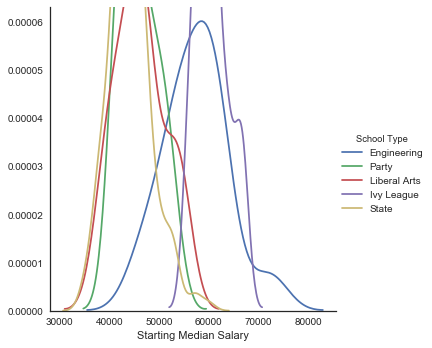

In [24]:
# A seaborn plot that plots univariate or bivariate density estimates is kdeplot.
#Plot school type by Starting Median Salary
sns.FacetGrid(college, hue="School Type", size=5) \
   .map(sns.kdeplot, "Starting Median Salary") \
   .add_legend()
plt.show()

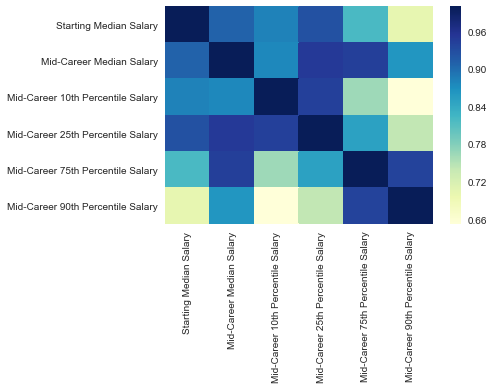

In [25]:
#Use a heatmap to view the correlation between variables in the dataset.

corr = college.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap="YlGnBu")
        
plt.show()

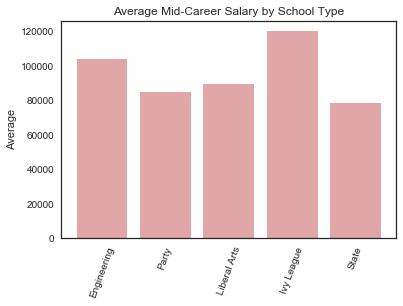

In [26]:
#A bar plot of the average Mid-Career Salary by school type
#Note: It is best not to take the average of a median if there are outliers 
objects = ('Engineering', 'Party',' Liberal Arts' ,'Ivy League','State')
y_pos = np.arange(len(objects))
performance = [103842,84685,89379,120125,78567]
 
plt.bar(y_pos, performance, align='center', alpha=0.5,  color='r')
plt.xticks(y_pos, objects, rotation='70')
plt.ylabel('Average')
plt.title('Average Mid-Career Salary by School Type')
 
plt.show()

In [27]:
#Use the visualization package bokeh to create a scatter plot that has an html output
#For image of chart, see bokeh_plot
from bokeh.charts import Scatter, output_file, show

p = Scatter(college, x='School Type', y='Starting Median Salary', color='darkmagenta', title="Starting Median Salary vs School Type",
            xlabel="School Type", ylabel="Starting Median Salary")

output_file("college.html")

show(p)

C:\Users\Patti\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='bc6b98a9-d155-4bdd-8c3d-ef95b9e6391c', ...)
